In [1]:
import csv
import numpy as np
temp_dict = {}
for i in range(1990,2015,1):
    temp_dict[i] = {}

country_list = ['Germany','European Union','Russian Federation','Turkey','United States of America','United Kingdom','Canada','Italy','Japan','Poland']
c_list = {}
for i in country_list:
    c_list[i] = []

filename = "greenhouse_gas_inventory_data_data.csv"
rows = []
with open(filename, 'r') as csvfile:

    csvreader = csv.reader(csvfile)
    fields = next(csvreader)
 
    for row in csvreader:
        #print(row)
        #year, month = int(row[0][:4]), int(row[0][5:7])
        if 'carbon_dioxide_co2' in row[3] and row[0] in country_list:
            temp_dict[int(row[1])][row[0]] = int(float(row[2]))   
            c_list[row[0]].append(int(float(row[2])))

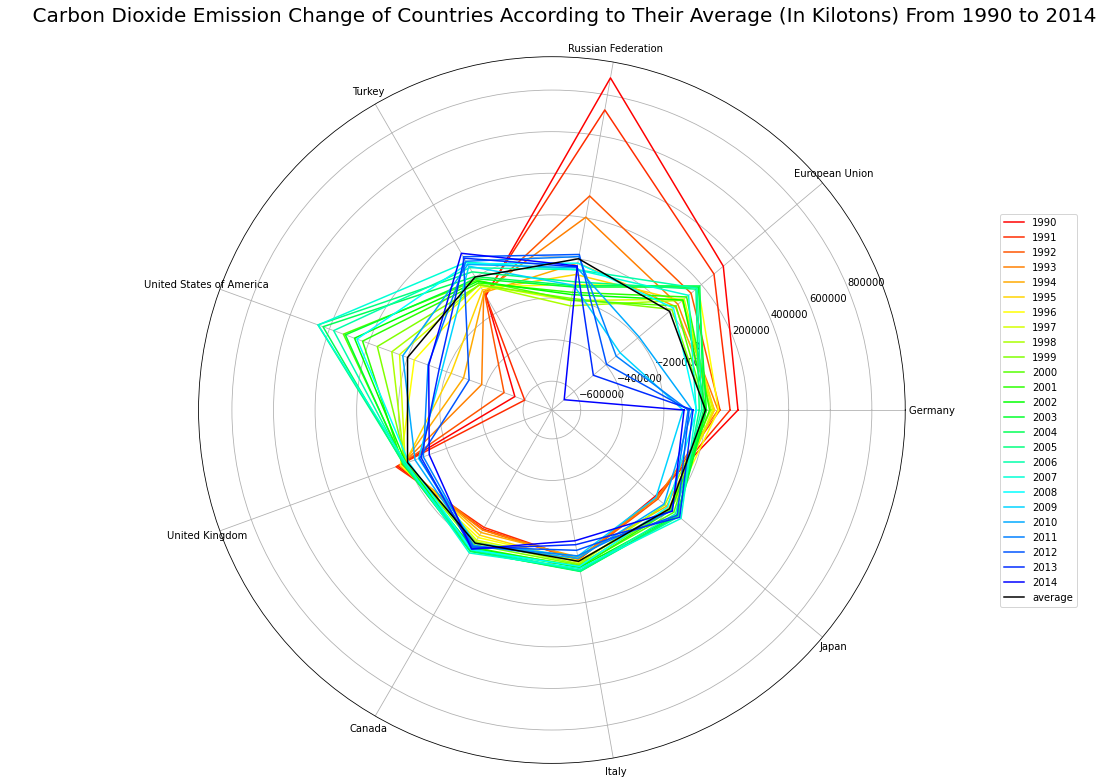

In [3]:
from colour import Color
avg = []
for num,i in enumerate(c_list.keys()):
    keys = c_list[i]
    avg.append(int(np.average(np.asarray(keys))))

red = Color("red")
colors = list(red.range_to(Color("blue"),25))
import matplotlib.pyplot as plt

fig = plt.figure(2,figsize=(13,13))
ax1 = plt.subplot(111, projection='polar')
ax1.set_title("    Carbon Dioxide Emission Change of Countries According to Their Average (In Kilotons) From 1990 to 2014", color='Black', fontdict={'fontsize': 20},pad= 35)
lines, labels = plt.thetagrids((0, 1*(360/9), 2*(360/9),3*(360/9),4*(360/9),5*(360/9),6*(360/9),7*(360/9),8*(360/9)), labels=('        Germany','European Union','Russian Federation','Turkey','United States of America','United Kingdom','Canada','Italy','Japan'))
for num,i in enumerate(temp_dict.keys()):
    ctries = temp_dict[i]
    r = []
    for j in country_list:
        r.append(ctries[j])
    r[-1] = r[0]
    avg[-1] = avg[0]
    
    #print(r)
    theta = np.linspace(0, 2*np.pi, 10)
    #print(np.asarray(r), np.asarray(r) -avg)
    ax1.plot(theta, np.asarray(r) - avg, color=colors[num].rgb, label = i)
    #print([num/len(temp_dict.keys()),num/len(temp_dict.keys()),0.5],colors[num])
ax1.plot(theta, [0,0,0,0,0,0,0,0,0,0], c=[0,0,0], label = 'average')
plt.legend(loc="right",bbox_to_anchor=(1.25,0.5))